# Setting Up the Environment

In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert the dataset to a DataFrame for better visualization and manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Data Preprocessing

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building the SVM Model

In [5]:
# Create and train an SVM model with a linear kernel
model_linear = SVC(kernel='linear', random_state=42)
model_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Model Evaluation

Accuracy: 0.9777777777777777

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



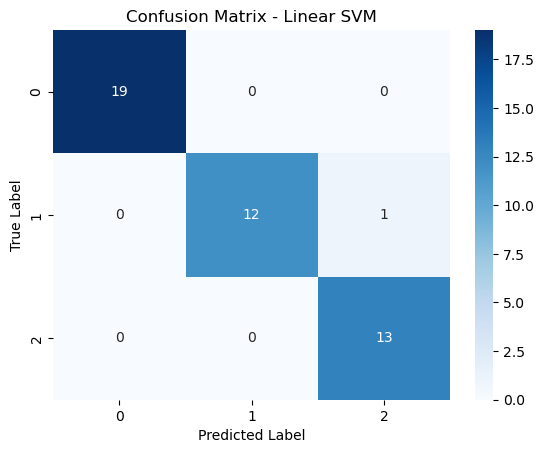

In [6]:
# Make predictions on the test set
y_pred_linear = model_linear.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Linear SVM')
plt.show()

# Experiment with Different Kernels

Accuracy (RBF Kernel): 1.0

Confusion Matrix (RBF Kernel):
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



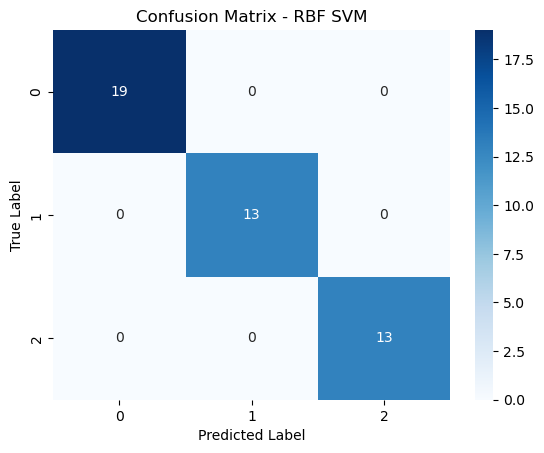

In [7]:
# Create and train an SVM model with an RBF kernel
model_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
model_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = model_rbf.predict(X_test)

# Evaluate the model
print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))
print("\nConfusion Matrix (RBF Kernel):\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - RBF SVM')
plt.show()

# Hyperparameter Tuning

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

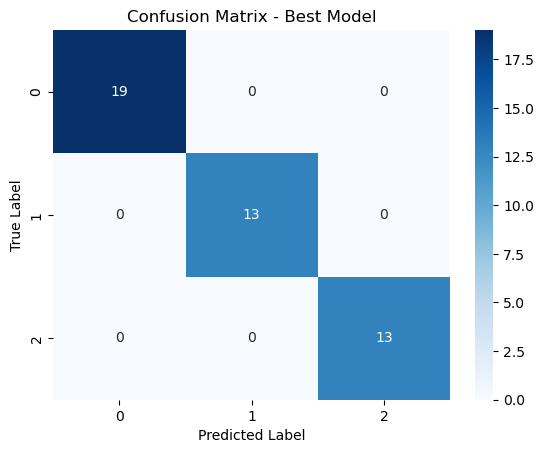

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters found by GridSearch:", grid.best_params_)

# Make predictions with the best model
y_pred_grid = grid.predict(X_test)

# Evaluate the model
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_grid))
print("\nConfusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_grid))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_grid))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Model')
plt.show()